In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# !pip install lxml
# !pip install matplotlib

In [233]:
dicst_aeroportos_icao = {
    "SBBR": "Aeroporto Internacional de Brasília / Presidente Juscelino Kubitschek", 
    "SBSP": "Aeroporto Internacional de São Paulo / Congonhas", 
    "SBGL": "Aeroporto Internacional do Rio de Janeiro / Galeão-Antônio Carlos Jobim", 
    "SBSV": "Aeroporto Internacional de Salvador / Deputado Luis Eduardo Magalhães", 
    "SBFL": "Aeroporto Internacional de Florianópolis / Hercílio Luz", 
    "SBPA": "Aeroporto Internacional de Porto Alegre / Salgado Filho", 
    "SBKP": "Aeroporto Internacional de Viracopos / Campinas", 
    "SBRF": "Aeroporto Internacional do Recife/ Guararapes – Gilberto Freyre", 
    "SBCT": "Aeroporto Internacional de Curitiba / Afonso Pena", 
    "SBBE": "Aeroporto Internacional de Belém / Val de Cans", 
    "SBVT": "Aeroporto de Vitória – Eurico de Aguiar Salles", 
    "SBRJ": "Aeroporto Santos Dumont", 
    "SBCY": "Aeroporto Internacional de Cuiabá / Marechal Rondon", 
    "SBCG": "Aeroporto Internacional de Campo Grande", 
    "SBFZ": "Aeroporto Internacional de Fortaleza / Pinto Martins", 
    "SBMQ": "Aeroporto Internacional de Macapá", 
    "SBMG": "Aeroporto Regional de Maringá / Silvio Name Junior", 
    "SBGO": "Aeroporto de Goiânia / Santa Genoveva", 
    "SBNF": "Aeroporto Internacional de Navegantes / Ministro Victor Konder", 
    "SBEG": "Aeroporto Internacional de Manaus / Eduardo Gomes", 
    "SBNT": "Aeroporto Internacional de Natal / Augusto Severo", 
    "SBPS": "Aeroporto Internacional de Porto Seguro", 
    "SBMO": "Aeroporto de Maceió / Zumbi dos Palmares", 
    "SSPS": "Aeroporto de Palmas/Brigadeiro Lysias Rodrigues", 
    "SBSL": "Aeroporto Internacional de São Luís / Marechal Cunha Machado", 
    "SBGR": "Aeroporto Internacional de São Paulo/Guarulhos-Governador André Franco Motoro", 
    "SBLO": "Aeroporto de Londrina / Governador José Richa", 
    "SBPV": "Aeroporto Internacional de Porto Velho / Governador Jorge Teixeira de Oliveira", 
    "SBRB": "Aeroporto Internacional de Rio Branco / Plácido de Castro", 
    "SBJV": "Aeroporto de Joinville / Lauro Carneiro de Loyola", 
    "SBUL": "Aeroporto de Uberlândia / Ten. Cel. Av. César Bombonato", 
    "SBCX": "Aeroporto Regional de Caxias do Sul / Hugo Cantergiani", 
    "SBFI": "Aeroporto Internacional de Foz do Iguaçu", 
    "SBTE": "Aeroporto de Teresina – Senador Petrônio Portella", 
    "SBAR": "Aeroporto Internacional de Aracaju / Santa Maria", 
    "SBJP": "Aeroporto Internacional de João Pessoa / Presidente Castro Pinto", 
    "SBPL": "Aeroporto de Petrolina / Senador Nilo Coelho", 
    "SBCF": "Aeroporto Internacional de Minas Gerais / Confins – Tancredo Neves", 
    "SBBV": "Aeroporto Internacional de Boa Vista / Atlas Brasil Cantanhede", 
    "SBKG": "Aeroporto de Campina Grande / Presidente João Suassuna", 
    "SBSN": "Aeroporto de Santarém / Maestro Wilson Fonseca", 
    "SBIL": "Aeroporto de Ilhéus/Bahia-Jorge Amado", 
    "SBJU": "Aeroporto de Juazeiro do Norte – Orlando Bezerra", 
    "SBIZ": "Aeroporto de Imperatriz – Prefeito Renato Moreira", 
    "SBCH": "Aeroporto de Chapecó – Serafin Enoss Bertaso", 
    "SBMA": "Aeroporto de Marabá", 
    "SBCZ": "Aeroporto Internacional de Cruzeiro do Sul", 
    "SBDN": "Aeroporto Estadual de Presidente Prudente", 
    "SBCB": "Aeroporto Internacional de Cabo Frio", 
    "SBFN": "Aeroporto de Fernando de Noronha", 
    "SJTC": "Aeroporto Estadual de Bauru/Arealva", 
    "SBMK": "Aeroporto de Montes Claros/Mário Ribeiro", 
    "SBBI": "Aeroporto de Bacacheri / Curitiba",
    "SBMT": "Aeroporto Campo de Marte",
}

In [507]:
#código para baixar os dados quando necessário
def parse_pages():
    db = pd.DataFrame()
    page = 1
    is_empty = False
    while not is_empty:
        tables = pd.read_html(f"https://sistema.cenipa.fab.mil.br/cenipa/baloeiro/pesquisa?&pag={page}", extract_links="all")
        df = tables[1]
        #limpando a base com as tublas dos links. 
        for column in df.columns:
            if column == df.columns[-1]:
                index = 1
            else: 
                index = 0
            df[column] = df[column].str[index]
        
        new_header = df.iloc[0]
        df = df[1:] 
        df.columns = new_header 
        
        is_empty = df.empty
        if not is_empty:
            print('\r', "Pegando a página ", page, end='')
            db = pd.concat([db, df], ignore_index=True)
            page += 1
        
    return db

In [254]:
# df = parse_pages()
# df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df = pd.read_csv("./dados.csv", sep=";")

In [256]:
len(df)

7261

In [257]:
df['Data'] = pd.to_datetime(df['Data'])

In [258]:
df.head(2)

,Tipo Reporte,Operador,Aeródromo,Data,Hora,UF,Cidade,Fase de Operação,Efeito no Voo,Colisão,Unnamed: 10,year,month
0,CONTROLADOR DE TRÁFEGO AÉREO,TWR-GL,SBGL,2023-09-24,07:00:00,RJ,Rio de Janeiro,Outra,Nenhum,Não,detalhar?op===AUUhmRVxGcPZlRRpXTWJVU&acao=deta...,2023,9
1,OPERADOR,BMKC,SBMT,2023-09-24,10:15:00,SP,Sao Paulo,Outra,Nenhum,Não,detalhar?op===AUUhmRVxGcPFGbSNUTWJVU&acao=deta...,2023,9


## Análise das colisões

In [11]:
collision = df[df["Colisão"] == "Sim"]

In [12]:
len(collision)

32

In [14]:
collision.head(2)

,Tipo Reporte,Operador,Aeródromo,Data,Hora,UF,Cidade,Fase de Operação,Efeito no Voo,Colisão,Unnamed: 10,year,month
24,CONTROLADOR DE TRÁFEGO AÉREO,KLM791,SBGR,2023-09-18,22:37:00,SP,Guarulhos,NaN,Pouso,Sim,detalhar?op===AUUhmRVxGcLFGbSNVTWJVU&acao=deta...,2023,9
1620,ADMINISTRAÇÃO AEROPORTUÁRIA,GOL,SBGR,2022-02-20,08:40:00,SP,Guarulhos,Outra,Outros,Sim,detalhar?op===AUUJlcZhlSTZlRSVXTWJVU&acao=deta...,2022,2


## Análise da evolução no tempo de casos de balões reportados

In [15]:
def getMonth(s):
  return s.month

def getYear(s):
  return s.year


In [23]:
df["year"] = df["Data"].apply(lambda x: getYear(x))
df["month"] = df["Data"].apply(lambda x: getMonth(x))

In [29]:
df["Colisão"] = df["Colisão"].fillna("")

In [24]:
df.head(2)

,Tipo Reporte,Operador,Aeródromo,Data,Hora,UF,Cidade,Fase de Operação,Efeito no Voo,Colisão,Unnamed: 10,year,month
0,CONTROLADOR DE TRÁFEGO AÉREO,TWR-GL,SBGL,2023-09-24,07:00:00,RJ,Rio de Janeiro,Outra,Nenhum,Não,detalhar?op===AUUhmRVxGcPZlRRpXTWJVU&acao=deta...,2023,9
1,OPERADOR,BMKC,SBMT,2023-09-24,10:15:00,SP,Sao Paulo,Outra,Nenhum,Não,detalhar?op===AUUhmRVxGcPFGbSNUTWJVU&acao=deta...,2023,9


In [53]:
def count_collitions(x):
    return x[x.str.contains('Sim')].count()

grouped_dados = df.groupby(["year", "month"]).agg(
    count=("Colisão", 'count'),
    collisions=("Colisão", count_collitions),
)

In [54]:
grouped_dados = grouped_dados.reset_index()

In [55]:
grouped_dados_2023 = grouped_dados[grouped_dados["year"] == 2023]

In [56]:
grouped_dados_2023["count"].sum()

804

In [57]:
grouped_dados

,year,month,count,collisions
0,1974,5,1,0
1,1980,6,1,0
2,1981,12,1,0
3,1983,11,1,0
4,1988,8,1,0
...,...,...,...,...
163,2023,5,161,0
164,2023,6,135,0
165,2023,7,98,0
166,2023,8,60,0


<Axes: xlabel='month'>

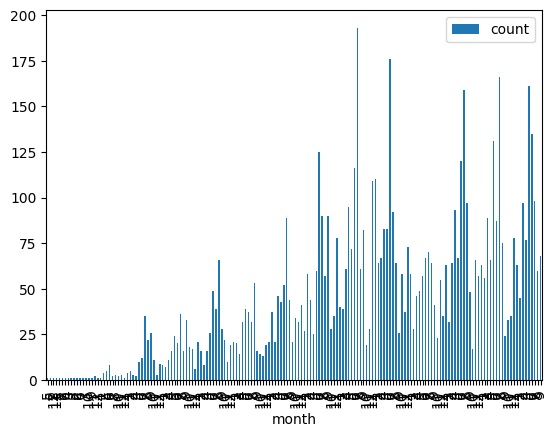

In [73]:
grouped_dados.plot.bar(x="month", y="count")

## Análise até o mês final deste ano

In [60]:
df_filtered = df[df["Data"].dt.month <= 9]

In [61]:
grouped = df_filtered.groupby(["year"]).agg(
    count=("Colisão", 'count'),
    collisions=("Colisão", count_collitions),
)

In [87]:
grouped = grouped.reset_index()
grouped

,year,count,collisions
0,1974,1,0
1,1980,1,0
2,1988,1,0
3,1990,1,0
4,1992,1,0
5,1999,2,1
6,2000,1,0
7,2001,2,0
8,2002,1,0
9,2008,1,0


<Axes: >

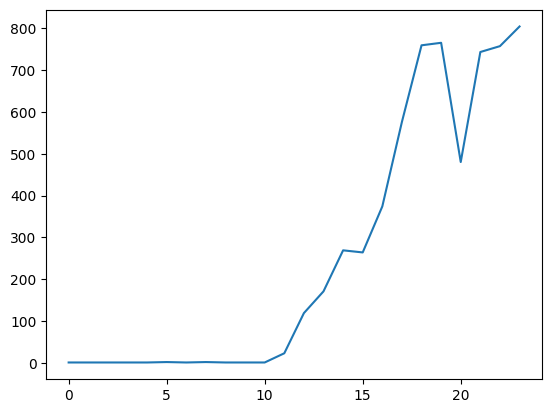

In [470]:
grouped["count"].plot.line()

In [459]:
#Plotly
fig = px.line(
    grouped, x="year", y="count",
    title="Incidência de Balões por ano<br><sup>2023 figura como o recorde (dados consideram reportes até setembro em todos os anos)</sup>",
)
fig.update_layout(
    xaxis_title="Ano", yaxis_title="Número de reportes",
)
fig.show()

In [460]:
fig.write_html("pages/total.html")

## Qual mês do ano mais acontece?

In [89]:
df.head(2)

,Tipo Reporte,Operador,Aeródromo,Data,Hora,UF,Cidade,Fase de Operação,Efeito no Voo,Colisão,Unnamed: 10,year,month
0,CONTROLADOR DE TRÁFEGO AÉREO,TWR-GL,SBGL,2023-09-24,07:00:00,RJ,Rio de Janeiro,Outra,Nenhum,Não,detalhar?op===AUUhmRVxGcPZlRRpXTWJVU&acao=deta...,2023,9
1,OPERADOR,BMKC,SBMT,2023-09-24,10:15:00,SP,Sao Paulo,Outra,Nenhum,Não,detalhar?op===AUUhmRVxGcPFGbSNUTWJVU&acao=deta...,2023,9


<Axes: >

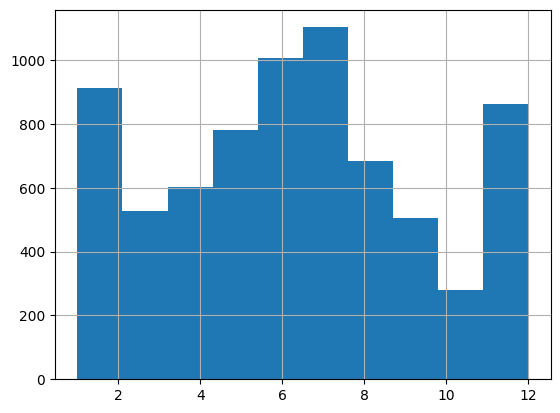

In [468]:
df["month"].hist()

In [457]:
### Versão Plotly
fig = px.histogram(
    df, x="month",
    title="Incidência de Balões<br><sup>Julho e junho lideram, seguidos por dezembro e janeiro</sup>",
)

fig.update_layout(
    xaxis_title="Mês do ano (Janeiro = 1)", yaxis_title="Número de reportes",
)
fig.show()

## Principais aeroportos

In [500]:
aeroportos = df[
        (df["year"] >= 2016) & (df["Data"].dt.month <= 9)
    ]\
    .groupby(["year", "Aeródromo"]).agg(contagem=("Colisão", "count")).reset_index()

In [502]:
aeroportos_pivoted = pd.pivot_table(aeroportos, values="contagem", index=["Aeródromo"], columns=["year"])

In [504]:
### Ajustando porque tem o erro na tabela de separar GRU do SBGR
SBGR = aeroportos_pivoted[aeroportos_pivoted.index.isin(["SBGR", "GRU"])].sum()
aeroportos_pivoted[aeroportos_pivoted.index == "SBGR"] = SBGR
aeroportos_pivoted = aeroportos_pivoted.drop(index=["GRU"]) # Apagando a coluna de GRU que já foi somada

In [505]:
aeroportos_final = aeroportos_pivoted.sort_values(2023, ascending=False).reset_index().head(10)

In [506]:
aeroportos_final

year,Aeródromo,2016,2017,2018,2019,2020,2021,2022,2023
0,SBRJ,15.0,63.0,98.0,60.0,47.0,147.0,151.0,174.0
1,SBKP,52.0,57.0,41.0,35.0,63.0,111.0,74.0,98.0
2,SBGR,77.0,114.0,236.0,232.0,91.0,89.0,94.0,52.0
3,SBGL,37.0,34.0,30.0,71.0,48.0,77.0,56.0,45.0
4,SBMT,1.0,3.0,20.0,4.0,20.0,9.0,16.0,41.0
5,SBBI,12.0,22.0,15.0,9.0,16.0,19.0,10.0,39.0
6,SBJR,5.0,46.0,69.0,51.0,38.0,17.0,23.0,33.0
7,SBSP,22.0,46.0,52.0,84.0,20.0,45.0,41.0,30.0
8,SBSC,6.0,13.0,10.0,5.0,5.0,10.0,4.0,14.0
9,SBAF,3.0,10.0,29.0,25.0,25.0,21.0,21.0,14.0


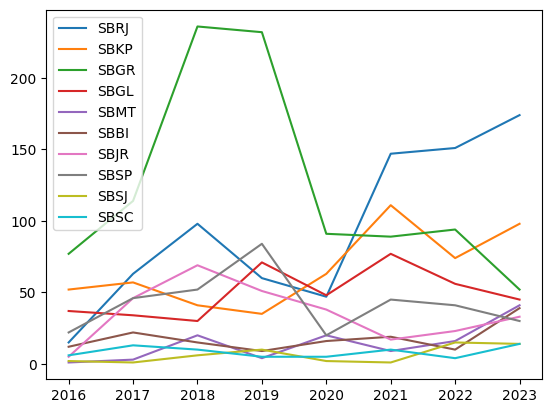

In [499]:
x = aeroportos_final.columns[1:]
  
# plot lines
for aeroporto in list(aeroportos_final["Aeródromo"]):
    values = aeroportos_final[aeroportos_final["Aeródromo"] == aeroporto].values[0][1:]
    plt.plot(x, values, label = aeroporto)

plt.legend()
plt.show()

In [442]:
aeroportos_melted = pd.melt(aeroportos_final, id_vars=["Aeródromo"], var_name="year")
aeroportos_melted["nome"] = aeroportos_melted["Aeródromo"].apply(lambda x: dicst_aeroportos_icao.get(x))

In [461]:
#plotly
fig = px.line(
    aeroportos_melted, x="year", y="value", color='Aeródromo', hover_data=["nome", "value", "year"],
    title="Incidência de Balões / Aeroportos<br><sup>Santos Dumont lidera ranking; Guarulhos, que liderava, passou para terceiro lugar</sup>",
)
fig.update_layout(
    xaxis_title="Ano", yaxis_title="Número de reportes",
)
fig.show()